In [4]:
import os
import pandas as pd
import sys 
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import re


In [5]:
# Read of our input files that have all the information collected about our genomes and the corresponding PGCfinder informations
df_brut = pd.read_csv('../results/lists_PGC/list_organisms_merged.csv')

# Read the csv already modified to have all the informations 
df_bryant= pd.read_csv('../data/supp_data_from_thiel_et_al_2018/table_3.tsv', sep='\t', header=0, na_values=['na'])
df_bryant_copy = df_bryant.copy()

df_all = pd.read_csv('../data/lists/list_with_taxonomy.csv', low_memory=False)

In [6]:
# Basic representation of our data
#df_brut.describe()

# Describe doesn't work with this df
df_bryant.describe()

,Unnamed: 9
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [7]:
# Creation of a clean dataframe
df_clean = df_brut.dropna(subset=['#Organism Name'])
#print(df_clean.describe())

# Creation of a PGC dataframe
df_PGC = df_clean[df_clean['number of genes'] > 24]
df_PGC.to_csv('../results/lists_PGC/list_organisms_merged_PGC.csv')
#print(df_PGC.describe())
df_PGC_alpha = df_PGC[df_PGC['Organism Groups'].str.contains('Alpha')]
df_PGC_beta = df_PGC[df_PGC['Organism Groups'].str.contains('Beta')]
df_PGC_gamma = df_PGC[df_PGC['Organism Groups'].str.contains('Gamma')]

df_PGC.describe()

,Size(Mb),GC%,Scaffolds,CDS,number of PGC,number of genes
count,253.000000,253.000000,253.000000,253.000000,253.0,253.000000
mean,4.676585,63.623004,2.533597,4230.260870,1.0,31.158103
std,1.500391,8.205838,2.146393,1364.975912,0.0,1.500894
min,1.795160,0.000000,1.000000,0.000000,1.0,25.000000
25%,3.669070,63.000000,1.000000,3341.000000,1.0,31.000000
50%,4.425480,65.300000,1.000000,4127.000000,1.0,31.000000
75%,5.599210,68.000000,3.000000,4929.000000,1.0,32.000000
max,8.493510,71.600000,9.000000,7530.000000,1.0,34.000000


In [8]:
# Stats by Class
print("Informations nettoyé: \n", df_clean['Organism Groups'].value_counts(), "\n")
print("Informations PGC: \n", df_PGC['Organism Groups'].value_counts(), "\n")
print("Informations Bryant: \n", df_bryant['Taxonomy'].value_counts())

Informations nettoyé: 
 Organism Groups
Bacteria;Pseudomonadota;Gammaproteobacteria    14900
Bacteria;Pseudomonadota;Betaproteobacteria      2580
Bacteria;Pseudomonadota;Alphaproteobacteria     2089
Bacteria;Pseudomonadota;Acidithiobacillia         17
Bacteria;Pseudomonadota;Zetaproteobacteria         2
Bacteria;Pseudomonadota;Hydrogenophilia            1
Name: count, dtype: int64 

Informations PGC: 
 Organism Groups
Bacteria;Pseudomonadota;Alphaproteobacteria    209
Bacteria;Pseudomonadota;Betaproteobacteria      30
Bacteria;Pseudomonadota;Gammaproteobacteria     14
Name: count, dtype: int64 

Informations Bryant: 
 Taxonomy
Alphaproteobacteria; Rhodobacterales; Rhodobacteraceae                                                      151
Alphaproteobacteria; Sphingomonadales; Sphingomonadaceae                                                     79
Alphaproteobacteria; Rhizobiales; Methylobacteriaceae                                                        72
Alphaproteobacteria; Sphingom

In [9]:
# Stats by Species
#print(df_clean['#Organism Name'].value_counts())
print(df_PGC['#Organism Name'].value_counts().head(5))

#Organism Name
Rhodopseudomonas palustris    10
Cereibacter sphaeroides        7
Methylorubrum extorquens       6
Bradyrhizobium cosmicum        2
Rhodobacter capsulatus         2
Name: count, dtype: int64


In [10]:
# Stats by Genus
genus_clean = df_clean.loc[:, 'Genus'] = df_clean.loc[:, '#Organism Name'].str.split().str[0]
genus_PGC = df_PGC.loc[:, 'Genus'] = df_PGC['#Organism Name'].str.split().str[0]
genus_bryant = df_bryant.loc[:, 'Genus'] = df_bryant['Organism_name'].str.split().str[0]

genus_clean_counts = genus_clean.value_counts().sort_index()
genus_PGC_counts = genus_PGC.value_counts().sort_index()
genus_bryant_counts = genus_bryant.value_counts().sort_index()

# Aligner les indices pour correspondre aux genres présents dans les deux séries
aligned_genus_clean_counts, aligned_genus_PGC_counts = genus_clean_counts.align(genus_PGC_counts, fill_value=0)


# Calculer les pourcentages de genus_PGC par rapport à genus_clean
genus_percentage = (aligned_genus_PGC_counts / aligned_genus_clean_counts) * 100

# Afficher les 20 premiers genres en termes de pourcentage
#print(genus_percentage.sort_values(ascending=False).head(93))

print(genus_bryant_counts)


Organism_name
Acidiphilium       10
Acidisphaera        1
Aestuariivita       2
Afifella            2
Agrobacterium       3
                   ..
Tranquillimonas     1
Variovorax          1
gamma               1
marine              2
uncultured          2
Name: count, Length: 130, dtype: int64


/tmp/ipykernel_478030/4034465775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_clean = df_clean.loc[:, 'Genus'] = df_clean.loc[:, '#Organism Name'].str.split().str[0]
/tmp/ipykernel_478030/4034465775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genus_PGC = df_PGC.loc[:, 'Genus'] = df_PGC['#Organism Name'].str.split().str[0]


In [11]:
#print(genomes_list_PGC_alpha)
print(df_PGC_alpha["Assembly"])

0           GCA_000019725.1_ASM1972v1
2           GCA_000016185.1_ASM1618v1
3           GCA_000021005.1_ASM2100v1
5           GCA_000014045.1_ASM1404v1
130         GCA_000015165.1_ASM1516v1
                     ...             
17492    GCA_011047315.1_ASM1104731v1
17514    GCA_023380025.1_ASM2338002v1
17693     GCA_001663155.1_ASM166315v1
17694    GCA_015693905.1_ASM1569390v1
17737     GCA_009913435.1_ASM991343v1
Name: Assembly, Length: 209, dtype: object


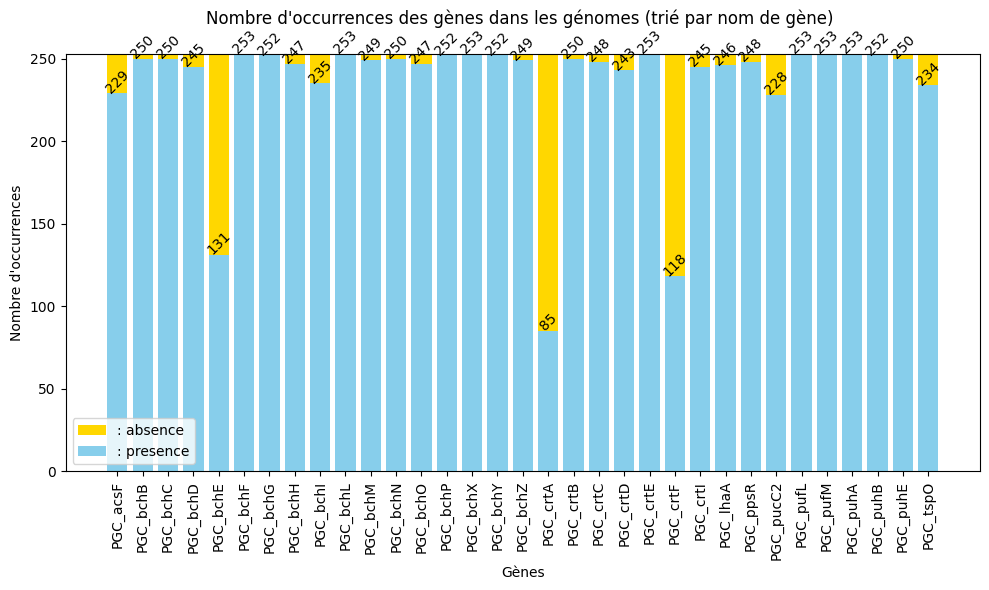

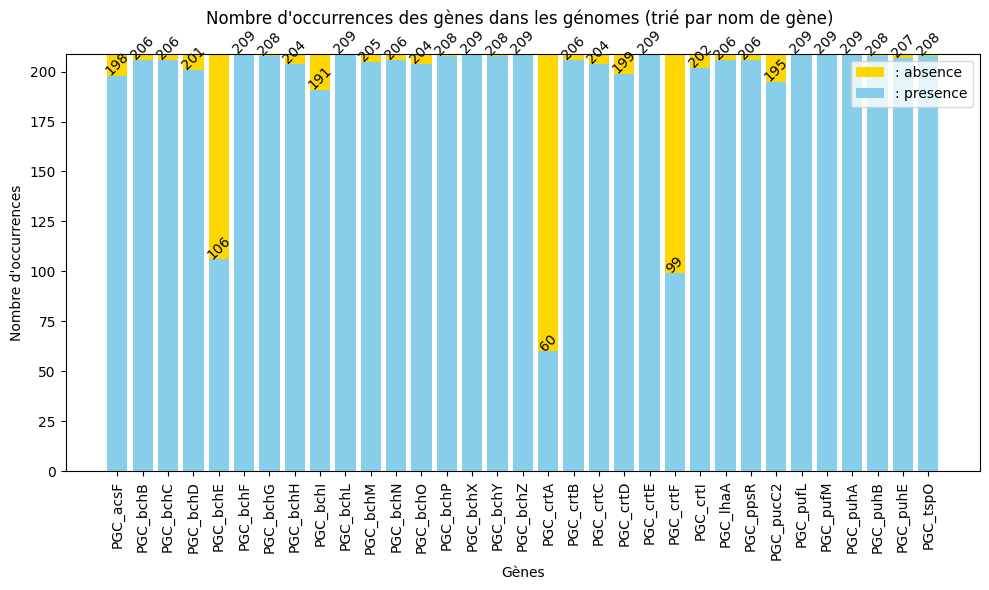

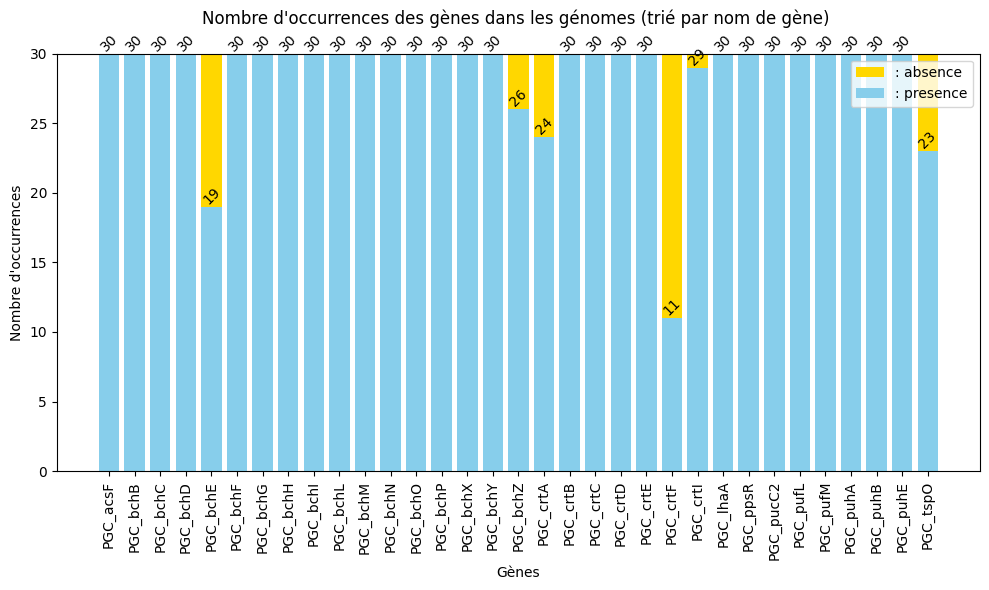

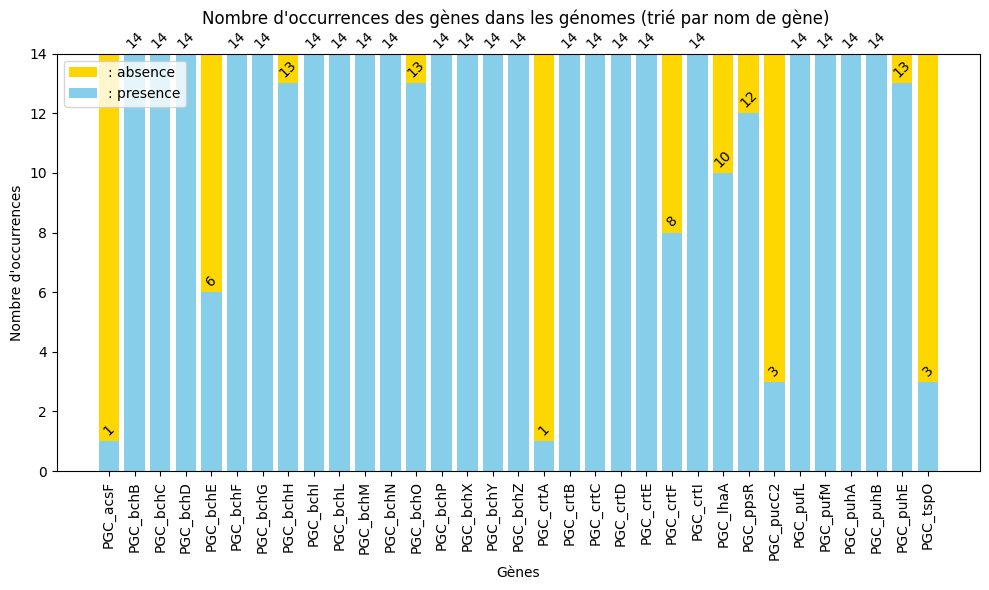

In [12]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def analyse_genomes(genomes):
    # Récupération des profils de gènes
    PROFILES = [os.path.splitext(os.path.basename(gene))[0] for gene in glob.glob("../data/profiles/*.hmm")]

    # Dictionnaire pour stocker les DataFrames
    dfs = {}

    for genome in genomes:
        path = f"../results/genomes_PGC/{genome}/PGCfinder/best_solution.tsv"
        dfs[genome] = pd.read_csv(path, sep='\t', comment='#')

    # Dictionnaire pour stocker les occurrences de chaque gène
    gene_counts = {gene: 0 for gene in PROFILES}

    # Boucle à travers chaque génome
    for genome in genomes:
        # Charger le DataFrame pour le génome actuel
        df = dfs[genome]
        
        # Boucle à travers chaque profil de gène
        for gene in PROFILES:
            # Vérifier si le gène est présent dans le DataFrame
            if gene in df['gene_name'].values:
                # Incrémenter le compte pour le gène actuel
                gene_counts[gene] += 1

    # Calculer le nombre total de génomes
    total_genomes = len(genomes)

    # Calculer la fréquence de chaque gène
    gene_frequencies = {gene: (count / total_genomes) * 100 for gene, count in gene_counts.items()}

    # Trier les gènes par ordre alphabétique
    sorted_genes = sorted(gene_frequencies.keys())

    # Récupérer les fréquences triées selon les noms de gènes
    sorted_frequencies = [gene_frequencies[gene] for gene in sorted_genes]

    # Calculer les occurrences pour chaque gène trié
    occurrences = [gene_counts[gene] for gene in sorted_genes]

    # Créer un histogramme
    plt.figure(figsize=(10, 6))

    # Calcul des barres pour l'absence
    max_occurrences = max(occurrences)
    remaining = [max_occurrences - occ if occ < max_occurrences else 0 for occ in occurrences]
    
    # Ajouter les barres jaunes pour l'absence
    plt.bar(range(len(sorted_genes)), remaining, bottom=occurrences, color='gold', label=': absence')

    # Ajouter les barres bleues pour la présence
    plt.bar(range(len(sorted_genes)), occurrences, color='skyblue', label=': presence')

    # Ajouter les nombres d'occurrences au-dessus des barres
    for i, occ in enumerate(occurrences):
        plt.text(i, occ + 0.2, f'{round(occ)}', ha='center', rotation=45)

    # Ajouter la légende
    plt.legend()

    plt.xlabel('Gènes')
    plt.ylabel('Nombre d\'occurrences')
    plt.title('Nombre d\'occurrences des gènes dans les génomes (trié par nom de gène) \n')
    plt.xticks(range(len(sorted_genes)), sorted_genes, rotation=90)
    plt.tight_layout()
    plt.show()
    
# Exemple d'utilisation avec une liste de génomes
genomes_list_PGC_all = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*")]
analyse_genomes(genomes_list_PGC_all)

# Cette étape est nécessaire car nos fichiers sont "GCF" ou "GCA" contrairement à notre colonne "Assembly" qui est uniquement en "GCA"
df_PGC_alpha.loc[:, 'Assembly'] = df_PGC_alpha['Assembly'].str.replace('GCA_', '')
df_PGC_beta.loc[:, 'Assembly'] = df_PGC_beta['Assembly'].str.replace('GCA_', '')
df_PGC_gamma.loc[:, 'Assembly'] = df_PGC_gamma['Assembly'].str.replace('GCA_', '')
df_PGC_alpha.loc[:, 'Assembly'] = df_PGC_alpha['Assembly'].str.replace('GCF_', '')
df_PGC_beta.loc[:, 'Assembly'] = df_PGC_beta['Assembly'].str.replace('GCF_', '')
df_PGC_gamma.loc[:, 'Assembly'] = df_PGC_gamma['Assembly'].str.replace('GCF_', '')

# Récupération des listes en utilisant les résultats partiels présent dans "Assembly" pour chaque df
genomes_list_PGC_alpha = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*") if any(assembly_partial_alpha in os.path.basename(genome) for assembly_partial_alpha in df_PGC_alpha['Assembly'])]
genomes_list_PGC_beta = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*") if any(assembly_partial in os.path.basename(genome) for assembly_partial in df_PGC_beta['Assembly'])]
genomes_list_PGC_gamma = [os.path.basename(genome) for genome in glob.glob("../results/genomes_PGC/GC*") if any(assembly_partial_gamma in os.path.basename(genome) for assembly_partial_gamma in df_PGC_gamma['Assembly'])]

# Pour faire fonctionner cette fonction il faut avoir au préalable un dataframe possèdant la colonne 'Assembly' avec dans les cases les noms partiels (ou entier) des fichiers que nous allons rechercher pour récupérer les différents gènes
# Ici je récupère un subset d'un dataframe propre avec comme condition le nom de la classe recherché (alpha, beta ou gamma). Nous pourrions tester sur le genre aussi par exemple (mais potentiel manque de données)
analyse_genomes(genomes_list_PGC_alpha)
analyse_genomes(genomes_list_PGC_beta)
analyse_genomes(genomes_list_PGC_gamma)


In [13]:
df_PGC_species = df_PGC.copy()
df_bryant_species = df_bryant_copy.copy()
PGC_species = df_PGC_species["#Organism Name"] = df_PGC_species["#Organism Name"].str.split().str[:2].str.join(' ')
bryant_species = df_bryant_species.iloc[:, 1]

genus_bryant = pd.Series(genus_bryant, name="Genus")
genus_PGC = pd.Series(genus_PGC, name="Genus")

print(genus_bryant.value_counts(), " \n \n ", genus_PGC.value_counts())

Genus
Methylobacterium    72
Sphingomonas        30
Rhodobacter         26
Blastomonas         23
Porphyrobacter      20
                    ..
Roseomonas           1
Acidisphaera         1
Aurantimonas         1
Tranquillimonas      1
Nevskia              1
Name: count, Length: 130, dtype: int64  
 
  Genus
Methylobacterium        24
Polynucleobacter        17
Methylorubrum           15
Rhodopseudomonas        13
Sphingomonas            12
                        ..
Sphingosinicellaceae     1
Aurantimonas             1
Tateyamaria              1
Peteryoungia             1
Halorhodospira           1
Name: count, Length: 92, dtype: int64


In [14]:
print("Informations nettoyé: \n", df_clean['Organism Groups'].value_counts(), "\n")
print("Informations PGC: \n", df_PGC['Organism Groups'].value_counts(), "\n")

Informations nettoyé: 
 Organism Groups
Bacteria;Pseudomonadota;Gammaproteobacteria    14900
Bacteria;Pseudomonadota;Betaproteobacteria      2580
Bacteria;Pseudomonadota;Alphaproteobacteria     2089
Bacteria;Pseudomonadota;Acidithiobacillia         17
Bacteria;Pseudomonadota;Zetaproteobacteria         2
Bacteria;Pseudomonadota;Hydrogenophilia            1
Name: count, dtype: int64 

Informations PGC: 
 Organism Groups
Bacteria;Pseudomonadota;Alphaproteobacteria    209
Bacteria;Pseudomonadota;Betaproteobacteria      30
Bacteria;Pseudomonadota;Gammaproteobacteria     14
Name: count, dtype: int64 



In [15]:
# Ajout de ces deux dataframe qui prennent en compte le nombre d'espèce et non de souche
df_PGC_species = df_PGC.drop_duplicates(subset=["species"])
df_clean_species = df_clean.drop_duplicates(subset=["species"])

In [16]:
unique_clean = df_clean['Genus'].unique()
unique_PGC = df_PGC['Genus'].unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'Genus' égale à i dans df_PGC
    PGC_count = df_PGC['Genus'].value_counts()[i]
    clean_count = df_clean['Genus'].value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['Genus', 'Percentage PGC/all', 'number of bacteria in the genus with PGC', 'number of bacteria']
df_stats_genus = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_genus_sorted = df_stats_genus.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_genus_sorted.to_csv("../results/stats/stats_by_genus.csv", index=False)


In [17]:
# Normalisé par le nombre d'espèce et non de souche
unique_clean = df_clean['Genus'].unique()
unique_PGC = df_PGC['Genus'].unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'Genus' égale à i dans df_PGC
    PGC_count = df_PGC_species['Genus'].value_counts()[i]
    clean_count = df_clean_species['Genus'].value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['Genus', 'Percentage PGC/all', 'number of bacteria in the genus with PGC', 'number of bacteria']
df_stats_genus = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_genus_sorted = df_stats_genus.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_genus_sorted.to_csv("../results/stats/normalize_by_species/stats_by_genus.csv", index=False)

In [18]:
unique_clean = df_clean['family'].dropna().unique()
unique_PGC = df_PGC['family'].dropna().unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_PGC
    PGC_count = df_PGC['family'].fillna(0).value_counts()[i]

    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_clean
    clean_count = df_clean['family'].fillna(0).value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100 if clean_count != 0 else 0

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['family', 'Percentage PGC/all', 'number of bacteria in the family with PGC', 'number of bacteria']
df_stats_family = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_family_sorted = df_stats_family.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_family_sorted.to_csv("../results/stats/stats_by_family.csv", index=False)


In [19]:
# Normalisée par le nombre d'espèce et non de souche
unique_clean = df_clean['family'].dropna().unique()
unique_PGC = df_PGC['family'].dropna().unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_PGC
    PGC_count = df_PGC_species['family'].fillna(0).value_counts()[i]

    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_clean
    clean_count = df_clean_species['family'].fillna(0).value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100 if clean_count != 0 else 0

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['family', 'Percentage PGC/all', 'number of bacteria in the family with PGC', 'number of bacteria']
df_stats_family = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_family_sorted = df_stats_family.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_family_sorted.to_csv("../results/stats/normalize_by_species/stats_by_family.csv", index=False)


In [20]:
unique_clean = df_clean['order'].dropna().unique()
unique_PGC = df_PGC['order'].dropna().unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_PGC
    PGC_count = df_PGC['order'].fillna(0).value_counts()[i]

    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_clean
    clean_count = df_clean['order'].fillna(0).value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100 if clean_count != 0 else 0

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['order', 'Percentage PGC/all', 'number of bacteria in the order with PGC', 'number of bacteria in']
df_stats_order = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_order_sorted = df_stats_order.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_order_sorted.to_csv("../results/stats/stats_by_order.csv", index=False)


In [21]:
# Normalisée par le nombre d'espèces et non de souches
unique_clean = df_clean['order'].dropna().unique()
unique_PGC = df_PGC['order'].dropna().unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_PGC
    PGC_count = df_PGC_species['order'].fillna(0).value_counts()[i]

    # Récupérer le nombre de valeurs de la colonne 'family' égale à i dans df_clean
    clean_count = df_clean_species['order'].fillna(0).value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100 if clean_count != 0 else 0

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['order', 'Percentage PGC/all', 'number of bacteria in the order with PGC', 'number of bacteria in']
df_stats_order = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_order_sorted = df_stats_order.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_order_sorted.to_csv("../results/stats/normalize_by_species/stats_by_order.csv", index=False)


In [22]:
unique_clean = df_clean['class'].dropna().unique()
unique_PGC = df_PGC['class'].dropna().unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'class' égale à i dans df_PGC
    PGC_count = df_PGC['class'].fillna(0).value_counts()[i]

    # Récupérer le nombre de valeurs de la colonne 'class' égale à i dans df_clean
    clean_count = df_clean['class'].fillna(0).value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100 if clean_count != 0 else 0

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['class', 'Percentage PGC/all', 'number of bacteria in the class with PGC', 'number of bacteria']
df_stats_class = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_class_sorted = df_stats_class.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_class_sorted.to_csv("../results/stats/stats_by_class.csv", index=False)


In [23]:
# Ici j'aimerais normalisée par l'espèce et non prendre en compte toutes les souches
unique_clean = df_clean['class'].dropna().unique()
unique_PGC = df_PGC['class'].dropna().unique()

# Créer une liste vide pour stocker les résultats
results = []

for i in unique_PGC:
    # Récupérer le nombre de valeurs de la colonne 'class' égale à i dans df_PGC
    PGC_count = df_PGC_species['class'].fillna(0).value_counts()[i]

    # Récupérer le nombre de valeurs de la colonne 'class' égale à i dans df_clean
    clean_count = df_clean_species['class'].fillna(0).value_counts()[i]

    # Calculer le pourcentage
    percentage = (PGC_count / clean_count) * 100 if clean_count != 0 else 0

    # Ajouter les résultats à la liste
    results.append([i, percentage, PGC_count, clean_count])

# Créer un nouveau DataFrame à partir des résultats
columns = ['class', 'Percentage PGC/all', 'number of bacteria in the class with PGC', 'number of bacteria']
df_stats_class = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the "Percentage PGC/all" column in descending order
df_stats_class_sorted = df_stats_class.sort_values(by='Percentage PGC/all', ascending=False).reset_index(drop=True)

# Write the sorted DataFrame to a CSV file without the index
df_stats_class_sorted.to_csv("../results/stats/normalize_by_species/stats_by_class.csv", index=False)


In [24]:
# Vérification de la localisation intra ou extra cluster de tspO, bchO, crtE, bchE

output_silix = pd.read_csv("../results/lists_PGC/output_silix_fullname_v1.csv")
unique_genome_silix = output_silix["genome"].dropna().unique()
numbers=[]

genes_of_interest = ["PGC_bchE"]
with_nearby_gene=0
without_nearby_gene=0

for genome in unique_genome_silix:
    # Filter the dataframe to only include rows where the genome column matches the current genome
    filtered_df = output_silix[(output_silix["genome"] == genome) & output_silix["hit_gene"].notna()]

    # Extract the prot_id_unique column from the filtered dataframe
    gene_number = filtered_df["prot_id_unique"]

    # Remove the prefix "genome_" from each element in the gene_number series
    gene_number = gene_number.str.replace(f"{genome}_", "", regex=False)

    # Convert the gene_number series to integers
    gene_number = gene_number.astype(int)

    # Search for the genes of interest in the filtered dataframe
    for gene in genes_of_interest:
        gene_match = filtered_df[filtered_df['hit_gene'] == gene]
        if not gene_match.empty:
            # Get the position of the gene
            gene_position = gene_match.iloc[0]['prot_id_unique']
            gene_position = int(gene_position.replace(f"{genome}_", ""))

            # Get the indices of the genes within the range of +5 to -5
            nearby_indices = (gene_number >= gene_position - 5) & (gene_number <= gene_position + 5)

            # Get the nearby genes
            nearby_genes = filtered_df[nearby_indices]

            # Remove the gene in question from the nearby genes
            nearby_genes = nearby_genes[nearby_genes['hit_gene'] != gene]

            # Print the nearby genes
            if not nearby_genes.empty:
                print(f"Gene {gene} found in genome {genome} at position {gene_position} with nearby genes:")
                print(nearby_genes[['hit_gene', 'prot_id_unique']])
                with_nearby_gene = with_nearby_gene + 1
            else:
                print(f"Gene {gene} found in genome {genome} at position {gene_position} with no nearby genes")
                without_nearby_gene = without_nearby_gene + 1
        #else:
            #print(f"Gene {gene} not found in genome {genome}")

print(without_nearby_gene)
print(with_nearby_gene)


Gene PGC_bchE found in genome GCF_017795885.1_ASM1779588v1 at position 905 with nearby genes:
      hit_gene                    prot_id_unique
24    PGC_bchX  GCF_017795885.1_ASM1779588v1_907
25    PGC_bchC  GCF_017795885.1_ASM1779588v1_906
27    PGC_bchO  GCF_017795885.1_ASM1779588v1_903
28    PGC_bchD  GCF_017795885.1_ASM1779588v1_902
29    PGC_bchI  GCF_017795885.1_ASM1779588v1_901
3988  PGC_bchY  GCF_017795885.1_ASM1779588v1_908
6644  PGC_bchZ  GCF_017795885.1_ASM1779588v1_909
Gene PGC_bchE found in genome GCF_009363495.1_ASM936349v1 at position 3648 with nearby genes:
       hit_gene                    prot_id_unique
52     PGC_bchZ  GCF_009363495.1_ASM936349v1_3652
53     PGC_crtD  GCF_009363495.1_ASM936349v1_3646
54     PGC_tspO  GCF_009363495.1_ASM936349v1_3644
55     PGC_crtB  GCF_009363495.1_ASM936349v1_3643
7979   PGC_bchY  GCF_009363495.1_ASM936349v1_3651
8029   PGC_bchX  GCF_009363495.1_ASM936349v1_3650
9353   PGC_crtE  GCF_009363495.1_ASM936349v1_3647
9371   PGC_crtC  GCF

In [25]:
# Vérification de la localisation intra ou extra cluster de tspO, bchO, crtE, bchE

output_silix = pd.read_csv("../results/fasta/blast/output_silix_fullname_v1.csv")
unique_genome_silix = output_silix["genome"].dropna().unique()
numbers=[]

genes_of_interest = ["PGC_tspO", "PGC_bchO", "PGC_crtE", "PGC_bchE"]
gene_counts = {gene: {'with_nearby_gene': 0, 'without_nearby_gene': 0} for gene in genes_of_interest}

for genome in unique_genome_silix:
    # Filter the dataframe to only include rows where the genome column matches the current genome
    filtered_df = output_silix[(output_silix["genome"] == genome) & output_silix["hit_gene"].notna()]

    # Extract the prot_id_unique column from the filtered dataframe
    gene_number = filtered_df["prot_id_unique"]

    # Remove the prefix "genome_" from each element in the gene_number series
    gene_number = gene_number.str.replace(f"{genome}_", "", regex=False)

    # Convert the gene_number series to integers
    gene_number = gene_number.astype(int)

    # Search for the genes of interest in the filtered dataframe
    for gene in genes_of_interest:
        gene_match = filtered_df[filtered_df['hit_gene'] == gene]
        if not gene_match.empty:
            # Get the position of the gene
            gene_position = gene_match.iloc[0]['prot_id_unique']
            gene_position = int(gene_position.replace(f"{genome}_", ""))

            # Get the indices of the genes within the range of +5 to -5
            nearby_indices = (gene_number >= gene_position - 5) & (gene_number <= gene_position + 5)

            # Get the nearby genes
            nearby_genes = filtered_df[nearby_indices]

            # Remove the gene in question from the nearby genes
            nearby_genes = nearby_genes[nearby_genes['hit_gene'] != gene]

            # Update the gene counts
            if not nearby_genes.empty:
                gene_counts[gene]['with_nearby_gene'] += 1
            else:
                gene_counts[gene]['without_nearby_gene'] += 1

# Create a dataframe from the gene counts
gene_counts_df = pd.DataFrame(gene_counts).T.reset_index().rename(columns={'index': 'gene'})

# Print the gene counts dataframe
print(gene_counts_df)


       gene  with_nearby_gene  without_nearby_gene
0  PGC_tspO               199                   35
1  PGC_bchO               241                    6
2  PGC_crtE               207                   46
3  PGC_bchE               130                    1


In [26]:
# Le but ici est de récupérer les grandes familles connus mais non présentes dans PGCfinder pour tenter de les incorporer au modèl
famille_counts = output_silix["Family"].value_counts()
grandes_familles = output_silix[output_silix["Family"].isin(famille_counts[famille_counts > 100].index)]
petites_familles = output_silix[output_silix["Family"].isin(famille_counts[famille_counts < 100].index)]
print(grandes_familles["gene"].value_counts())

print(petites_familles["gene"].value_counts().head(30))

gene
no_gene_name    4335
ppsR             281
pufB             275
pufA             255
crtI             255
bchF             252
chlG             251
bchY             251
puhA             251
bchZ             248
bchL             245
pufL             244
bchC             244
pufM             244
bchM             242
puhB             242
bchB             241
puhC             236
puhE             232
acsF             228
bchI             219
hemA             180
pufC             164
crtC              11
tspO               9
cycA               8
bchH               2
bioF               1
hpnD               1
bchD               1
Name: count, dtype: int64
gene
no_gene_name    4719
dxs               77
idi               71
pufQ              53
crtY              49
bchJ              48
hemC              44
queA              41
coaD              40
bchE              37
hemE              27
pufX              25
hemF              24
purL              21
pyk               21
ispH              1

In [27]:
print(grandes_familles["hit_gene"].value_counts())

hit_gene
PGC_ppsR     285
PGC_bchL     253
PGC_bchX     253
PGC_puhA     253
PGC_bchF     253
PGC_pufL     253
PGC_pufM     253
PGC_bchY     252
PGC_bchG     252
PGC_bchP     252
PGC_puhB     252
PGC_lhaA     252
PGC_crtB     251
PGC_crtE     251
PGC_bchN     250
PGC_bchB     250
PGC_bchC     250
PGC_bchM     249
PGC_bchZ     249
PGC_crtC     248
PGC_bchH     247
PGC_crtD     246
PGC_crtI     245
PGC_bchD     244
PGC_bchO     244
PGC_puhE     243
PGC_tspO     241
PGC_bchI     235
PGC_acsF     229
PGC_pucC2    228
PGC_bchE     131
PGC_crtF     119
Name: count, dtype: int64


In [28]:
# Ici je peux observer les plus grandes familes présentes dans mon clustering avec SiliX, et en observant le fichier, savoir quelles gènes sont hit (voir carnet)
print(grandes_familles["Family"].value_counts())

Family
FAM000014    506
FAM000038    491
FAM000012    480
FAM000031    317
FAM000022    286
FAM000030    266
FAM000018    253
FAM000028    253
FAM000029    253
FAM000011    253
FAM000026    252
FAM000027    252
FAM000034    252
FAM000010    252
FAM000037    251
FAM000042    251
FAM000017    250
FAM000016    250
FAM000036    250
FAM000035    250
FAM000013    249
FAM000033    249
FAM000039    248
FAM000015    247
FAM000009    246
FAM000047    244
FAM000043    244
FAM000006    243
FAM000025    241
FAM000048    235
FAM000007    229
FAM000008    206
FAM000005    181
FAM000058    171
FAM000019    159
FAM000024    150
FAM000023    129
FAM000040    109
Name: count, dtype: int64


In [29]:
df_clean["PGC replicon type"].value_counts()

PGC replicon type
chromosome            243
plasmid                 7
plasmid/chromosome      1
chromosome/plasmid      1
unknown                 1
Name: count, dtype: int64

In [30]:
# Search for 'plasmid' in the 'Replicons' column
mask_plasmid = df_clean['Replicons'].str.contains('plasmid', na=False)
mask_chromosome = df_clean['Replicons'].str.contains('chromosome', na=False)
mask_plasmid_and_chromosome = df_clean['Replicons'].str.contains('plasmid', na=False) & ~df_clean['Replicons'].str.contains('chromosome', na=False)
mask_unknown = df_clean['Replicons'].str.contains('unknown', na=False) | df_clean['Replicons'].str.contains('Unknown', na=False)

# Count the number of times 'plasmid' appears
print(mask_plasmid.sum())
print(mask_chromosome.sum())
print(mask_plasmid_and_chromosome.sum())
print(mask_unknown.sum())


10413
19580
0
3


In [31]:
count_plasmid = df_clean['Replicons'].str.count('plasmid', flags=re.IGNORECASE).sum()
count_chromosome = df_clean['Replicons'].str.count('chromosome', flags=re.IGNORECASE).sum()

# Ici je compte le nombre d'occurence de "plamsid" et "chromosome" pour avoir un avis sur la distribution de ceux-ci au travers du génomes
print(count_plasmid)
print(count_chromosome)


28844.0
21530.0


In [32]:
# Bryant + PGCfinder
# Df contenant les lignes faisant parties d'une espèce ayant au moins un phototrophes d'après Bryant et ayant un pgc prédit par PGCfinder
df_clean_phototroph_genus = df_clean[df_clean["Phototrophic group by genus"].notnull() & df_clean["number of PGC"].notnull()]
# Df contenant les lignes ayant une espèce d'après Bryant et ayant un pgc prédit par PGCfinder
df_clean_phototroph = df_clean[df_clean["Phototrophic group"].notnull() & df_clean["number of PGC"].notnull()]
print(df_clean_phototroph_genus["Phototrophic group by genus"].value_counts())
print(df_clean_phototroph["Phototrophic group"].value_counts())


Phototrophic group by genus
pAAPB    112
PNSB      45
AAPB      29
PSB        7
Name: count, dtype: int64
Phototrophic group
pAAPB    39
PNSB     22
AAPB      9
PSB       6
Name: count, dtype: int64


In [33]:
# Bryant - PGCfinder
df_clean_phototroph_genus = df_clean[df_clean["Phototrophic group by genus"].notnull() & ~df_clean["number of PGC"].notnull()]
df_clean_phototroph = df_clean[df_clean["Phototrophic group"].notnull() & ~df_clean["number of PGC"].notnull()]
print(df_clean_phototroph_genus["Phototrophic group by genus"].value_counts())
print(df_clean_phototroph["Phototrophic group"].value_counts())


Phototrophic group by genus
pAAPB    393
PNSB      13
AAPB       9
Name: count, dtype: int64
Phototrophic group
AAPB    1
Name: count, dtype: int64


In [34]:
# PGCfinder - Bryant
df_clean_phototroph_genus = df_clean[~df_clean["Phototrophic group by genus"].notnull() & df_clean["number of PGC"].notnull()]
df_clean_phototroph = df_clean[~df_clean["Phototrophic group"].notnull() & df_clean["number of PGC"].notnull()]
print(df_clean_phototroph_genus["PGC replicon type"].value_counts())
print(df_clean_phototroph["PGC replicon type"].value_counts())


PGC replicon type
chromosome            56
plasmid                2
plasmid/chromosome     1
unknown                1
Name: count, dtype: int64
PGC replicon type
chromosome            171
plasmid                 4
plasmid/chromosome      1
unknown                 1
Name: count, dtype: int64


In [35]:
df_clean["order"].value_counts()

order
Enterobacterales                  8993
Burkholderiales                   2047
Pseudomonadales                   1551
Hyphomicrobiales                  1015
Moraxellales                       957
Xanthomonadales                    805
Pasteurellales                     639
Vibrionales                        595
Neisseriales                       401
Rhodobacterales                    335
Alteromonadales                    319
Aeromonadales                      263
Sphingomonadales                   247
Thiotrichales                      234
Rickettsiales                      219
Legionellales                      186
Rhodospirillales                   167
Oceanospirillales                  160
Caulobacterales                     61
Chromatiales                        50
Rhodocyclales                       49
Nitrosomonadales                    45
Cellvibrionales                     39
Methylococcales                     33
Acidithiobacillales                 17
Holosporales       

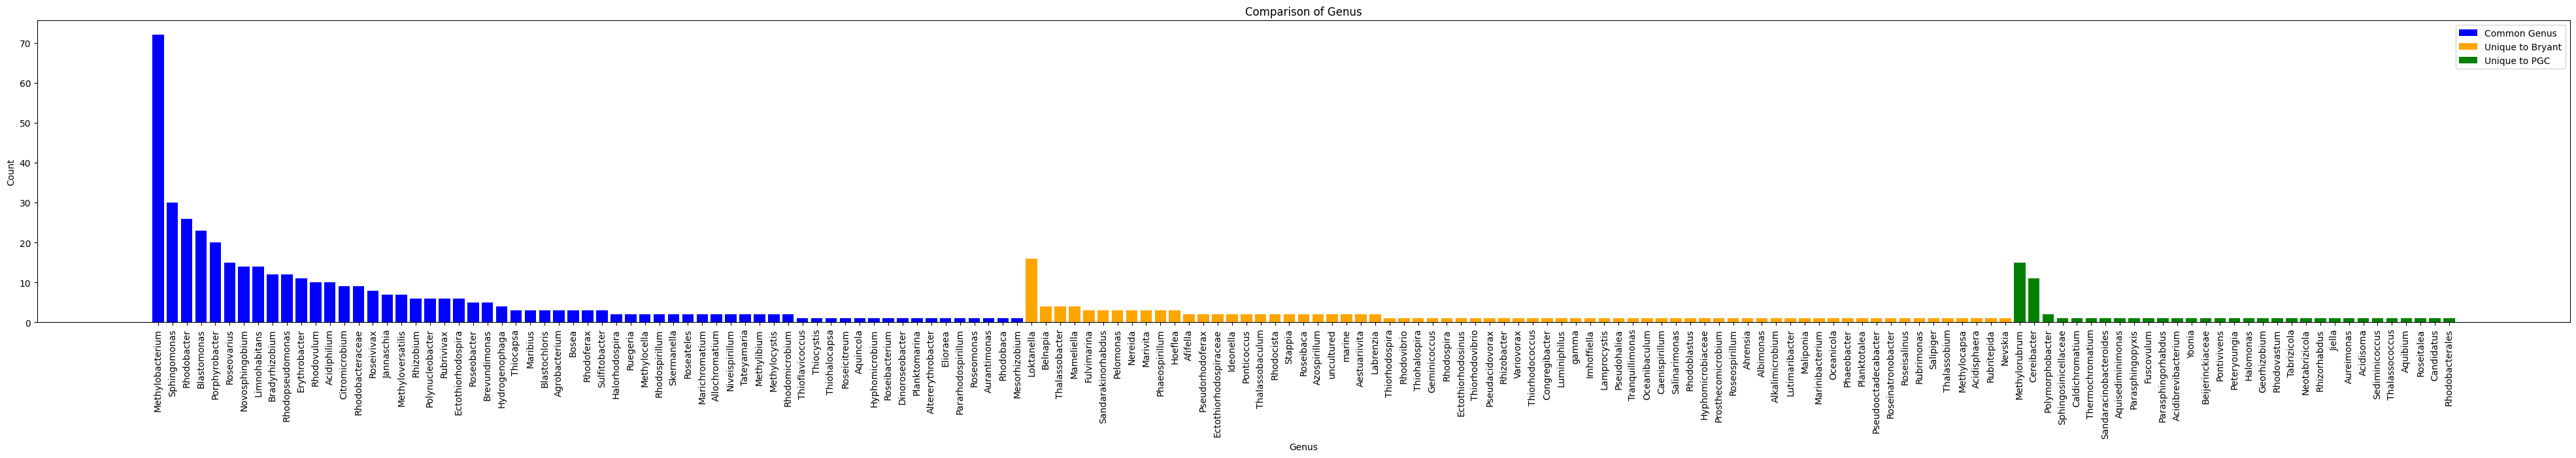

In [36]:
# Assuming PGC_species and bryant_species contain the species data as pandas Series objects

# Appliquer la fonction à chaque série
bryant_genus = bryant_species.str.split(" ").str[0]
PGC_genus = df_PGC["species"].str.split(" ").str[0]

# Merge DataFrames (optional, if you need to compare other columns as well)
merged_df_genus = pd.concat([bryant_genus, PGC_genus], axis=1, keys=['bryant_genus', 'PGC_genus'])

# Identify Common genus
common_genus = merged_df_genus['bryant_genus'].dropna().loc[merged_df_genus['bryant_genus'].isin(merged_df_genus['PGC_genus'])]

# Identify Unique genus
unique_bryant_genus= merged_df_genus['bryant_genus'][~merged_df_genus['bryant_genus'].isin(common_genus)].dropna()
unique_PGC_genus = merged_df_genus['PGC_genus'][~merged_df_genus['PGC_genus'].isin(common_genus)].dropna()

# Count and Visualize
plt.figure(figsize=(50, 6))

# Common genus
common_genus_counts = common_genus.value_counts()
plt.bar(common_genus_counts.index, common_genus_counts.values, color='blue', label='Common Genus')

# Unique genus
unique_bryant_genus_counts = unique_bryant_genus.value_counts()
unique_PGC_genus_counts = unique_PGC_genus.value_counts()
plt.bar(unique_bryant_genus_counts.index, unique_bryant_genus_counts.values, color='orange', label='Unique to Bryant')
plt.bar(unique_PGC_genus_counts.index, unique_PGC_genus_counts.values, color='green', label='Unique to PGC')

plt.xlabel('Genus')
plt.ylabel('Count')
plt.title('Comparison of Genus')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [37]:
import pandas as pd

# Assuming bryant_species and df_PGC["species"] are already defined

# Apply the split and unique operations to get the genus
bryant_genus = bryant_species.str.split(" ").str[0].unique()
PGC_genus = df_PGC["species"].str.split(" ").str[0].unique()

# Convert arrays to pandas Series
bryant_genus_series = pd.Series(bryant_genus, name='bryant_genus')
PGC_genus_series = pd.Series(PGC_genus, name='PGC_genus')

# Concatenate Series along axis=1 (columns)
merged_df_genus = pd.concat([bryant_genus_series, PGC_genus_series], axis=1)

# Now you can proceed with the rest of your analysis
common_genus = merged_df_genus['bryant_genus'].dropna().loc[merged_df_genus['bryant_genus'].isin(merged_df_genus['PGC_genus'])]
unique_bryant_genus = merged_df_genus['bryant_genus'][~merged_df_genus['bryant_genus'].isin(common_genus)].dropna()
unique_PGC_genus = merged_df_genus['PGC_genus'][~merged_df_genus['PGC_genus'].isin(common_genus)].dropna()

# Perform counts or further analysis as needed
common_genus_counts = common_genus.value_counts()
unique_bryant_genus_counts = unique_bryant_genus.value_counts()
unique_PGC_genus_counts = unique_PGC_genus.value_counts()

# Print totals
print(unique_bryant_genus_counts.sum())
print(unique_PGC_genus_counts.sum())
print(common_genus.value_counts().sum())

print(unique_PGC_genus_counts)



69
31
61
PGC_genus
Cereibacter               1
Georhizobium              1
Caldichromatium           1
Thermochromatium          1
Sandaracinobacteroides    1
Aquisediminimonas         1
Parasphingopyxis          1
Fuscovulum                1
Parasphingorhabdus        1
Acidibrevibacterium       1
Yoonia                    1
Beijerinckiaceae          1
Pontivivens               1
Peteryoungia              1
Sphingosinicellaceae      1
Halomonas                 1
Rhodovastum               1
Tabrizicola               1
Neotabrizicola            1
Rhizorhabdus              1
Jiella                    1
Polymorphobacter          1
Aureimonas                1
Acidisoma                 1
Sediminicoccus            1
Thalassococcus            1
Aquibium                  1
Methylorubrum             1
Roseitalea                1
Candidatus                1
Rhodobacterales           1
Name: count, dtype: int64


In [38]:
import pandas as pd

# Assuming bryant_species and df_PGC["species"] are already defined

# Apply the split and unique operations to get the genus
bryant_genus = bryant_species.unique()
PGC_genus = df_PGC["species"].unique()

# Convert arrays to pandas Series
bryant_genus_series = pd.Series(bryant_genus, name='bryant_genus')
PGC_genus_series = pd.Series(PGC_genus, name='PGC_genus')

# Concatenate Series along axis=1 (columns)
merged_df_genus = pd.concat([bryant_genus_series, PGC_genus_series], axis=1)

# Now you can proceed with the rest of your analysis
common_species = merged_df_genus['bryant_genus'].dropna().loc[merged_df_genus['bryant_genus'].isin(merged_df_genus['PGC_genus'])]
unique_bryant_species = merged_df_genus['bryant_genus'][~merged_df_genus['bryant_genus'].isin(common_genus)].dropna()
unique_PGC_species = merged_df_genus['PGC_genus'][~merged_df_genus['PGC_genus'].isin(common_genus)].dropna()

# Print totals
print(common_species)
print(unique_PGC_species)
print(unique_bryant_species)


2           Brevundimonas subvibrioides
3                      Aurantimonas sp.
7               Methylocella silvestris
8                             Bosea sp.
14           Rhodopseudomonas palustris
17                Blastochloris viridis
22             Rhodomicrobium vannielii
23           Methylobacterium aquaticum
27        Methylobacterium mesophilicum
28              Methylobacterium oryzae
29      Methylobacterium phyllosphaerae
33       Methylobacterium radiotolerans
35                 Methylobacterium sp.
39                  Methylocystis rosea
40                    Methylocystis sp.
44                   Mesorhizobium loti
46                    Agrobacterium sp.
47                        Rhizobium sp.
60                       Jannaschia sp.
81                         Maribius sp.
89              Planktomarina temperata
94              Rhodobaca barguzinensis
96               Rhodobacter capsulatus
99                      Rhodobacter sp.
105                      Rhodovulum sp.


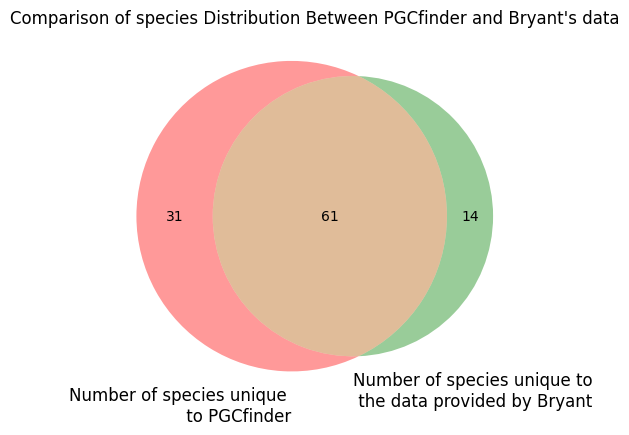

In [39]:
#print(bryant_species.str.split(" ").str[0])
#print(unique_bryant_genus_counts.tail(19))
#print(unique_PGC_genus_counts)
#print(common_genus.value_counts())

# Import the library
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (31, 14, 61), set_labels = ('Number of species unique \n to PGCfinder', 'Number of species unique to \n the data provided by Bryant'))

plt.title('Comparison of species Distribution Between PGCfinder and Bryant\'s data')
plt.show()

In [40]:
df_clean["family"].unique()

array(['Methylobacteriaceae', 'Anaplasmataceae', 'Rhodospirillaceae',
       'Paracoccaceae', 'Acetobacteraceae', 'Roseobacteraceae',
       'Nitrobacteraceae', 'Burkholderiaceae', 'Comamonadaceae',
       'Phyllobacteriaceae', 'Rhizobiaceae', 'Hyphomicrobiaceae',
       'Pseudomonadaceae', 'Azospirillaceae', 'Granulosicoccaceae',
       'Colwelliaceae', 'Oxalobacteraceae', 'Alcaligenaceae',
       'Enterobacteriaceae', 'Boseaceae', 'Vibrionaceae', 'Yersiniaceae',
       'Sphingomonadaceae', 'Xanthomonadaceae', 'Bruguierivoracaceae',
       'Aeromonadaceae', 'Pectobacteriaceae', 'Chromobacteriaceae',
       'Aurantimonadaceae', 'Xanthobacteraceae', 'Alteromonadaceae',
       'Brucellaceae', 'Hafniaceae', 'Cellvibrionaceae', 'Shewanellaceae',
       'Morganellaceae', 'Moraxellaceae', 'Pseudoalteromonadaceae',
       'Microbulbiferaceae', 'Rhodanobacteraceae', 'Beijerinckiaceae',
       'Caulobacteraceae', 'Marinobacteraceae', 'Devosiaceae',
       'Erwiniaceae', nan, 'Legionellaceae', '

In [41]:
output_silix[(output_silix["hit_gene"] == "PGC_bchE") & (output_silix["hit_gene"] == "PGC_crtF")]
#output_silix[output_silix["hit_gene"] == "PGC_crtF"]

,Family,prot_id_unique,genome,seq,prot_id,beginning,end,strand,gene,product,refseq_id,replicon_type,hit_gene


In [42]:
from collections import defaultdict

# Récupération de l'output de silix possédant tous les différents numéros de gènes
df_silix = pd.read_csv("../results/lists_PGC/output_silix_fullname_v1.csv")
df_taxonomy = pd.read_csv("../results/lists_PGC/list_organisms_merged_PGC.csv")

# Filtrer les lignes où 'hit_gene' n'est pas NaN
df_silix_clean = df_silix[df_silix["hit_gene"].notna()]

# Sélectionner les colonnes d'intérêt dans df_taxonomy
df_taxonomy_clean = df_taxonomy[["Assembly", "#Organism Name", "class", "order", "family", "genus", "species", "Phototrophic group", "PGC replicon type"]]

# Modifier la colonne pour merge
df_silix_clean['genome'] = df_silix_clean['genome'].str.replace('GCF', 'GCA')

# Fusionner les DataFrames sur les colonnes "genome" et "Assembly"
df_merged = df_silix_clean.merge(df_taxonomy_clean, left_on="genome", right_on="Assembly")

# Obtenir une liste ordonnée de 'prot_id_unique' et 'hit_gene' pour chaque génome
genome_info_dict = {}
for genome, group in df_merged.groupby("genome"):
    sorted_group = group.sort_values("prot_id_unique")
    prot_id_hit_gene_list = list(zip(sorted_group["hit_gene"]))
    genome_info_dict[genome] = prot_id_hit_gene_list

# Pour chaque génome, afficher la liste ordonnée des 'prot_id_unique' et 'hit_gene'
# for genome, info_list in genome_info_dict.items():
#     print(f"Genomes: {genome}, Sorted prot_id_unique and hit_gene: {info_list}")

def proximity_matrix(df,dict):
    pair_count = defaultdict(int)

    for genome in df['genome']:
        if genome in genome_info_dict:
            hit_genes = genome_info_dict[genome]
            for i in range(len(hit_genes) - 1):
                pair = (hit_genes[i], hit_genes[i + 1])
                pair_count[pair] += 1

    # Convertir le dictionnaire en DataFrame
    pair_df = pd.DataFrame(pair_count.items(), columns=["pair", "count"])
    pair_df["hit_gene1"] = pair_df["pair"].apply(lambda x: x[0])
    pair_df["hit_gene2"] = pair_df["pair"].apply(lambda x: x[1])
    pair_df = pair_df.drop(columns=["pair"])

    return pair_df[["hit_gene1", "hit_gene2", "count"]]

df_silix_beta = df_merged[df_merged["class"] == "Betaproteobacteria"]
genome_beta = df_silix_beta[["class", "genome"]]

result = proximity_matrix(genome_beta, genome_info_dict)
print(result)

        hit_gene1     hit_gene2  count
0     (PGC_tspO,)   (PGC_bchP,)    574
1     (PGC_bchP,)  (PGC_pucC2,)    670
2    (PGC_pucC2,)   (PGC_bchG,)    670
3     (PGC_bchG,)   (PGC_puhE,)    511
4     (PGC_puhE,)   (PGC_acsF,)    768
..            ...           ...    ...
118   (PGC_crtC,)   (PGC_crtE,)     32
119   (PGC_crtB,)   (PGC_bchI,)     66
120   (PGC_bchP,)   (PGC_crtB,)     66
121   (PGC_bchY,)   (PGC_pufL,)     30
122   (PGC_ppsR,)   (PGC_puhE,)     30

[123 rows x 3 columns]


/tmp/ipykernel_478030/1205353379.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_silix_clean['genome'] = df_silix_clean['genome'].str.replace('GCF', 'GCA')


/tmp/ipykernel_478030/1408564103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_silix_clean['genome'] = df_silix_clean['genome'].str.replace('GCF', 'GCA')


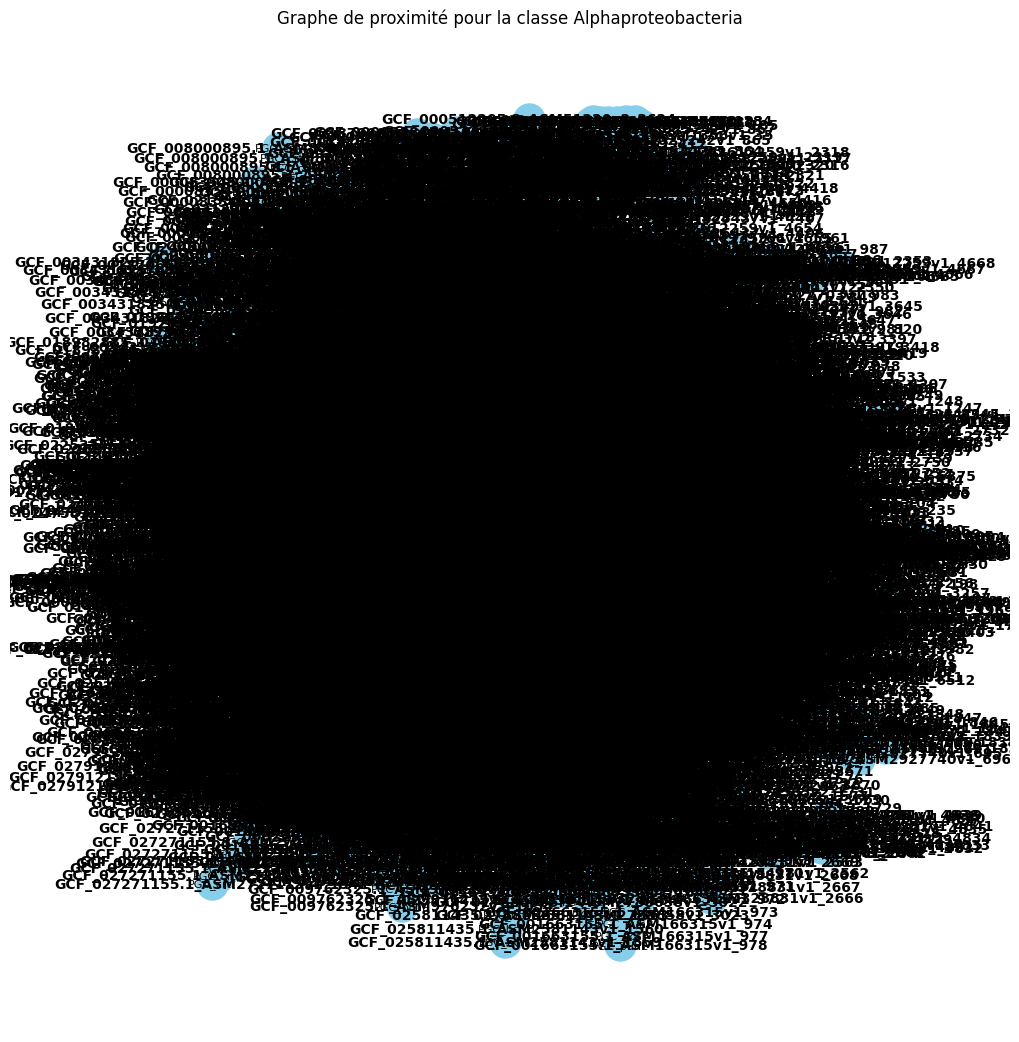

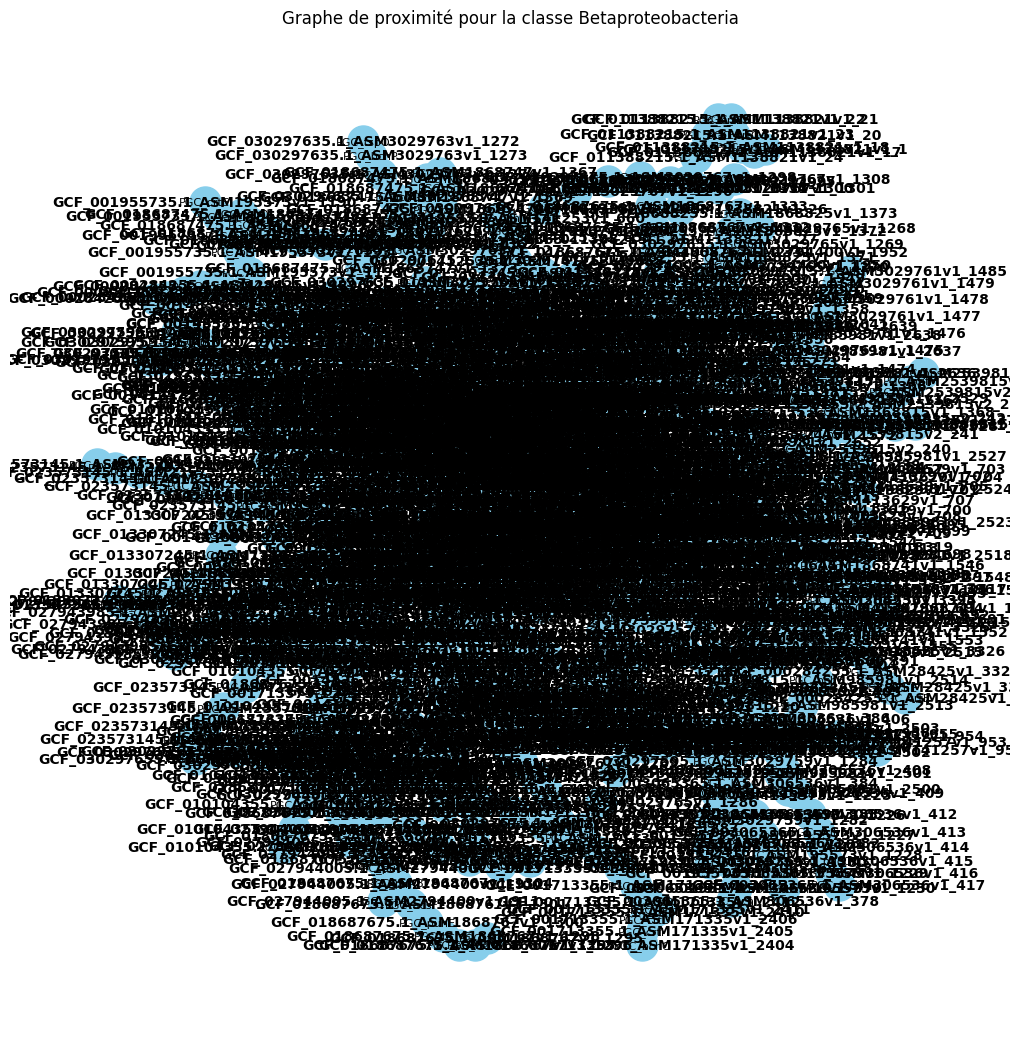

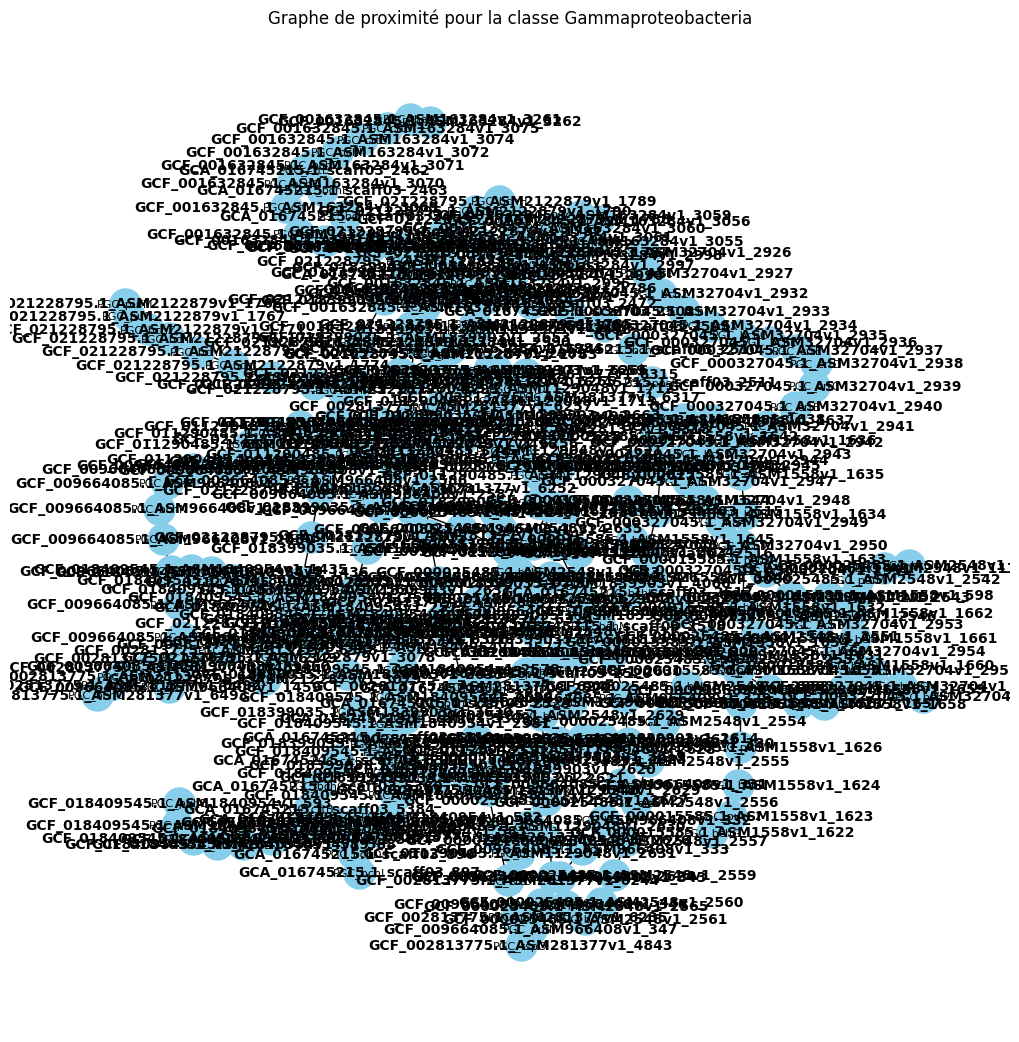

In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Récupération de l'output de silix possédant tous les différents numéros de gènes
df_silix = pd.read_csv("../results/lists_PGC/output_silix_fullname_v1.csv")
df_taxonomy = pd.read_csv("../results/lists_PGC/list_organisms_merged_PGC.csv")

# Filtrer les lignes où 'hit_gene' n'est pas NaN
df_silix_clean = df_silix[df_silix["hit_gene"].notna()]

# Sélectionner les colonnes d'intérêt dans df_taxonomy
df_taxonomy_clean = df_taxonomy[["Assembly", "#Organism Name", "class", "order", "family", "genus", "species", "Phototrophic group", "PGC replicon type"]]

# Modifier la colonne pour merge
df_silix_clean['genome'] = df_silix_clean['genome'].str.replace('GCF', 'GCA')

# Fusionner les DataFrames sur les colonnes "genome" et "Assembly"
df_merged = df_silix_clean.merge(df_taxonomy_clean, left_on="genome", right_on="Assembly")

# Initialiser un dictionnaire pour stocker les graphes de chaque classe
class_graphs = {}

# Grouper par classe
for class_name, class_group in df_merged.groupby("class"):
    # Créer un graphe pour chaque classe
    G = nx.Graph()
    
    # Ajouter des nœuds et des arêtes basés sur les informations disponibles
    for genome, group in class_group.groupby("genome"):
        sorted_group = group.sort_values("prot_id_unique")
        prot_id_hit_gene_list = list(zip(sorted_group["prot_id_unique"], sorted_group["hit_gene"], sorted_group["class"], sorted_group["order"], sorted_group["family"]))
        
        for prot_id, hit_gene, class_name, order, family in prot_id_hit_gene_list:
            # Ajouter des nœuds pour chaque prot_id_unique
            G.add_node(prot_id, hit_gene=hit_gene, class_name=class_name, order=order, family=family, genome=genome)
        
        # Connecter les nœuds (ici, on crée des arêtes entre les nœuds consécutifs, mais cela peut être ajusté)
        for i in range(len(prot_id_hit_gene_list) - 1):
            G.add_edge(prot_id_hit_gene_list[i][0], prot_id_hit_gene_list[i + 1][0])
    
    # Stocker le graphe dans le dictionnaire
    class_graphs[class_name] = G

# Visualiser les graphes pour chaque classe
for class_name, G in class_graphs.items():
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
    labels = nx.get_node_attributes(G, 'hit_gene')
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    plt.title(f"Graphe de proximité pour la classe {class_name}")
    plt.show()
